# 05 - Predictive Modeling Execution & Inference

**Description:** This notebook serves as a high-level interface to the modeling pipeline defined in `src/modeling.py`. It executes the training and evaluation process and then demonstrates how to load the saved model to make predictions on new data.

### 1. Setup and Imports

In [1]:
import pandas as pd
import sys
from pathlib import Path

# Setup project path to find the 'src' module
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src import config
from src.modeling import train_and_evaluate_model, load_model

# Load the cleaned data
df = pd.read_csv(config.CLEANED_DATA_FILE)

print("Setup complete.")

Setup complete.


### 2. Train and Evaluate Model
We execute the entire training and evaluation pipeline with a single function call. This function will train the model, print evaluation metrics, display performance plots, and save the final model artifact.

Starting model training pipeline...
Performing final feature engineering...
Preparing features and target variable...
Split data: 3054 for training, 764 for testing.
Training XGBoost model...
Model training completed.
Evaluating model performance on test data...
R-squared (R²): 0.8036
Mean Absolute Error (MAE): 7.1466


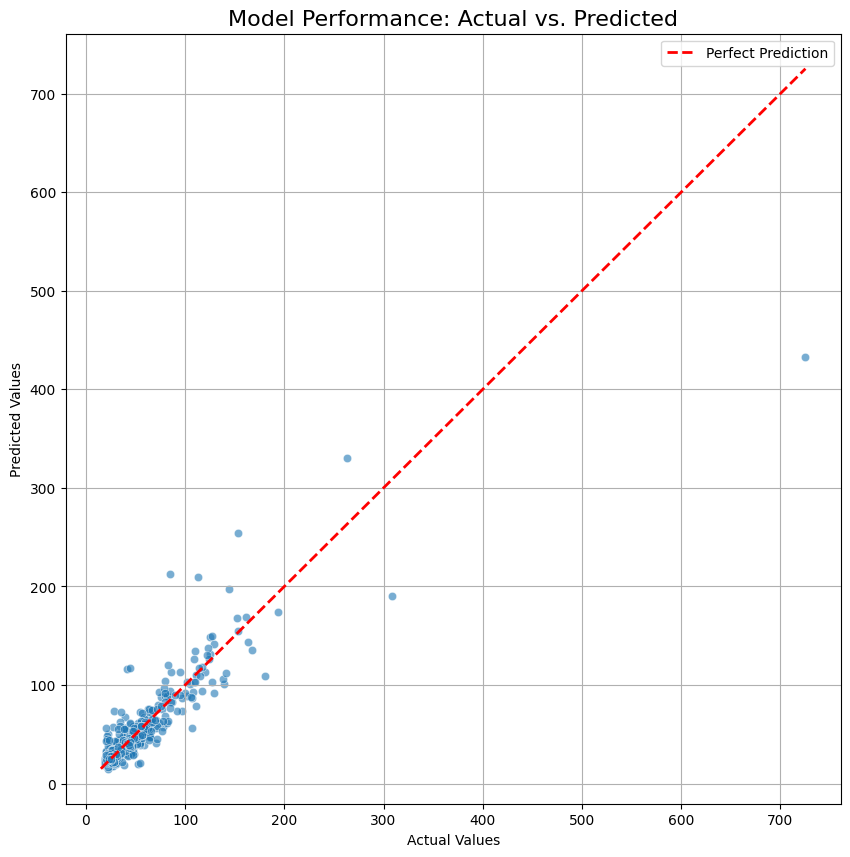

Saving trained model to: c:\Users\cld4ca\Desktop\Spotify\models\track_score_predictor.joblib
Model saved successfully.
Model training pipeline finished.


In [2]:
trained_model = train_and_evaluate_model(df)

### 3. Load Saved Model and Make a Prediction
This section demonstrates how to use our saved model for inference on a new, hypothetical track. This simulates a real-world application.

In [3]:
# Load the production-ready model from the file path specified in config
production_model = load_model()

# Create a hypothetical new song's data
# (ensure the columns match the `MODEL_FEATURES` in config.py)
new_song_data = pd.DataFrame([{
    'spotify_streams': 1500000,
    'spotify_playlist_count': 500,
    'spotify_playlist_reach': 2000000,
    'spotify_popularity': 60,
    'youtube_views': 2500000,
    'youtube_likes': 150000,
    'tiktok_posts': 2000,
    'tiktok_views': 5000000,
    'shazam_counts': 25000,
    'airplay_spins': 1000,
    'days_since_release': 30,
    'explicit_track': 1
}])

# Use the model to predict the track_score
predicted_score = production_model.predict(new_song_data)

print(f"The predicted track score for the new song is: {predicted_score[0]:.2f}")

Loading model from c:\Users\cld4ca\Desktop\Spotify\models\track_score_predictor.joblib...
The predicted track score for the new song is: 45.31
